# 1. Data

In [1]:
import pandas as pd
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cardekho_data.csv')
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [3]:
for col in df.columns:
    print('-'*80)
    print(col)
    print(df[col].unique())
    

--------------------------------------------------------------------------------
Car_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 '

In [4]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


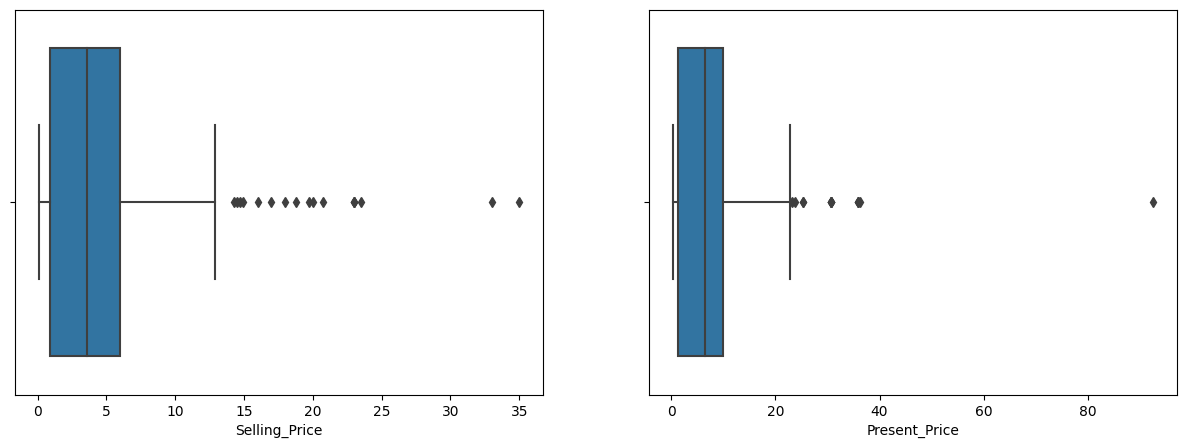

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(df, x='Selling_Price')
plt.subplot(122)
sns.boxplot(df, x='Present_Price')
plt.show()

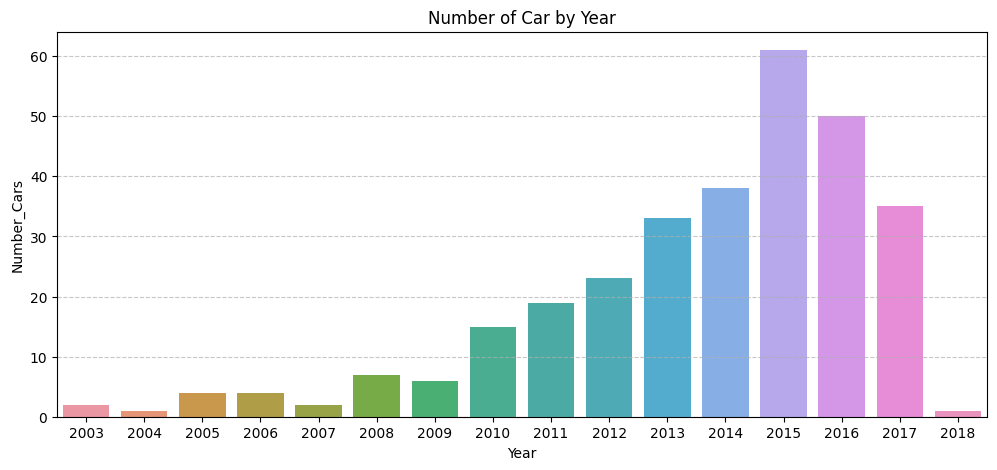

In [6]:
plt.figure(figsize=(12,5))
sns.barplot(df.groupby('Year')['Car_Name'].count().reset_index(name='Number_Cars'),
             x='Year', 
             y='Number_Cars')
plt.title('Number of Car by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
            
            

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# 2. Manual adjustment of data

In [9]:
# Manual adjustment of data

fuel_type = {'Petrol':0,
             'Diesel':1,
             'CNG':2}

Seller_Type = {'Dealer':1,
               'Individual':0}

Transmission = {'Manual':0,
                'Automatic':1}

df['Fuel_Type'] = df['Fuel_Type'].map(fuel_type)
df['Seller_Type'] = df['Seller_Type'].map(Seller_Type)
df['Transmission'] = df['Transmission'].map(Transmission)
df['Age_Car'] = 2024 - df['Year']
df.drop(columns=['Car_Name','Year'], inplace=True)
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Car
0,3.35,5.59,27000,0,1,0,0,10
1,4.75,9.54,43000,1,1,0,0,11
2,7.25,9.85,6900,0,1,0,0,7


In [10]:
# data for model validation
df2 = df.sample(10, random_state=10)
df2.shape

(10, 8)

In [11]:
# Data for model training and testing
df = df.drop(index=df2.index)
df.shape

(291, 8)

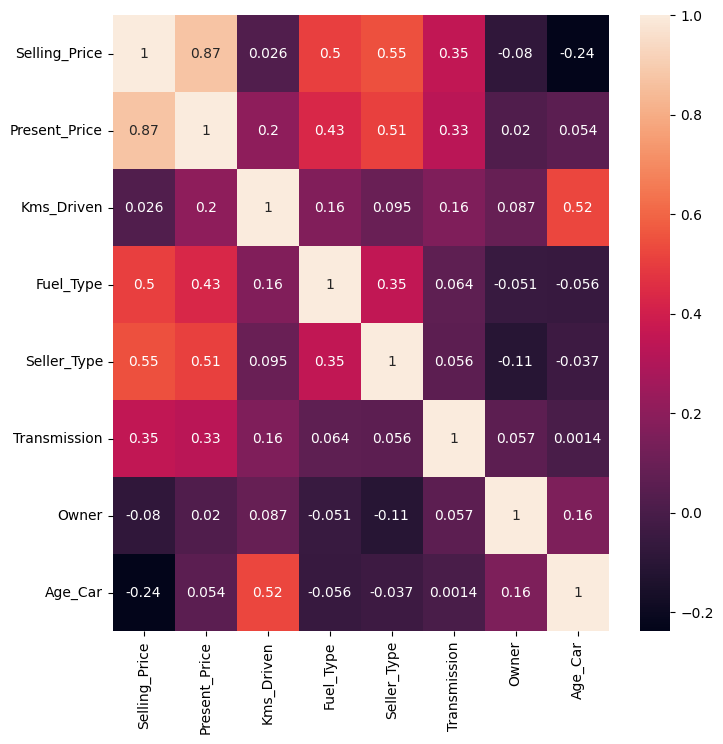

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# 3. Initial Analysis

In [13]:
# separating a variable target
X = df.drop(columns='Selling_Price')
y = df.Selling_Price

------------------------------------------------------------
Modelo                            : RandomForestRegressor
Média do Mean Squared Error (MSE) : 2.992967542199311
Média do R2 Score                 : 0.8827758836659972
Média do Mean Absolute Error (MAE): 0.7143848797250859
------------------------------------------------------------


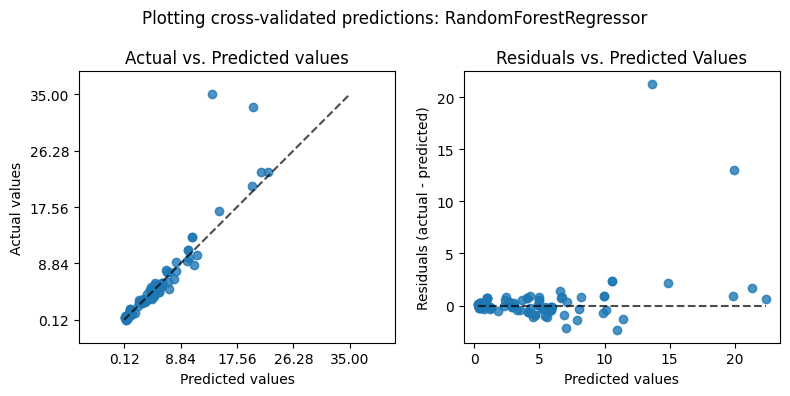

------------------------------------------------------------
Modelo                            : DecisionTreeRegressor
Média do Mean Squared Error (MSE) : 3.0340061855670104
Média do R2 Score                 : 0.881168542912549
Média do Mean Absolute Error (MAE): 0.7787628865979382
------------------------------------------------------------


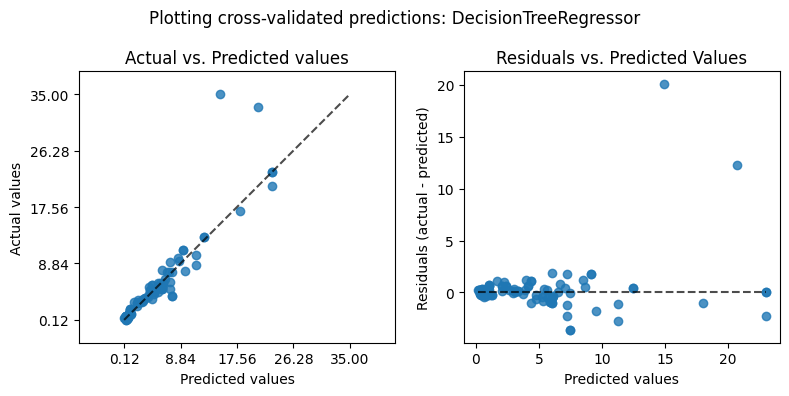

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.metrics import PredictionErrorDisplay, mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


# models list
models = [RandomForestRegressor(), DecisionTreeRegressor()]

for model in models:
    model.fit(X, y)
    y_pred = cross_val_predict(model, X, y, cv=10)
    # Metrics for fold
    mse_scores = mean_squared_error(y, y_pred)
    r2_scores = r2_score(y, y_pred)
    mae_scores = mean_absolute_error(y, y_pred)    
    
    # getting average metrics
    avg_mse = mse_scores.mean()
    avg_r2 = r2_scores.mean()
    avg_mae = mae_scores.mean()
    
    print("-"*60)
    print(f'Modelo                            : {type(model).__name__}')
    print(f'Média do Mean Squared Error (MSE) : {avg_mse}')
    print(f'Média do R2 Score                 : {avg_r2}')
    print(f'Média do Mean Absolute Error (MAE): {avg_mae}')
    print("-"*60)    
    
    # Visualization 
    fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
    PredictionErrorDisplay.from_predictions(y, y_pred=y_pred, 
                                            kind="actual_vs_predicted", 
                                            subsample=100, ax=axs[0], random_state=0,)
    axs[0].set_title("Actual vs. Predicted values")
    PredictionErrorDisplay.from_predictions(y, y_pred=y_pred, 
                                            kind="residual_vs_predicted", 
                                            subsample=100, ax=axs[1], random_state=0,)
    axs[1].set_title("Residuals vs. Predicted Values")
    fig.suptitle(f"Plotting cross-validated predictions: {type(model).__name__}")
    plt.tight_layout()
    plt.show()

# 4. Search de best param_grid

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.metrics import PredictionErrorDisplay, mean_squared_error, r2_score, mean_absolute_error


# separating X and y for training
X = df.drop(columns='Selling_Price')
y = df.Selling_Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameters you want to optimize
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForest regressor
rf_reg = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(estimator=rf_reg, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# getting the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"best_params        : {best_params}")
print(f"Mean Squared Error : {mse}")
print(f"R2 Score           : {r2}")
print(f"Mean Absolute Error: {mae}")


best_params        : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error : 3.1888903626960587
R2 Score           : 0.8632931180717713
Mean Absolute Error: 0.691319181978061


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.metrics import PredictionErrorDisplay, mean_squared_error, r2_score, mean_absolute_error


# separating X and y for training
X = df.drop(columns='Selling_Price')
y = df.Selling_Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameters you want to optimize
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create the DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to find the best combination of parameters
grid_search = GridSearchCV(estimator=dt_reg, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# getting the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"best_params        : {best_params}")
print(f"Mean Squared Error : {mse}")
print(f"R2 Score           : {r2}")
print(f"Mean Absolute Error: {mae}")


best_params        : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error : 1.594205383393888
R2 Score           : 0.9316568391104179
Mean Absolute Error: 0.7194981060606062


# 5. Training the models for use on validation data

In [17]:
# separating X and y for training
X = df.drop(columns='Selling_Price')
y = df.Selling_Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training the model
rf_reg = RandomForestRegressor(max_depth=10, 
                               min_samples_leaf=1, 
                               min_samples_split=2, 
                               n_estimators=200, 
                               random_state=42)
rf_reg.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred = rf_reg.predict(X_test)

print(f'Modelo             :  {type(rf_reg).__name__}')
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score           : ', r2_score(y_test, y_pred))

Modelo             :  RandomForestRegressor
mean_absolute_error:  0.691319181978061
mean_squared_error :  3.1888903626960587
r2_score           :  0.8632931180717713


In [18]:
# separating X and y for training
X = df.drop(columns='Selling_Price')
y = df.Selling_Price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training the model
dt_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2,random_state=42)
dt_reg.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = dt_reg.predict(X_test)

print(f'Modelo             :  {type(dt_reg).__name__}')
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred))
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score           : ', r2_score(y_test, y_pred))

Modelo             :  DecisionTreeRegressor
mean_absolute_error:  0.7194981060606062
mean_squared_error :  1.594205383393888
r2_score           :  0.9316568391104179


# 6. Evaluating the model with unknown data

In [19]:
df2.reset_index(drop=True, inplace=True)
X = df2.drop(columns='Selling_Price')
y = df2.Selling_Price

In [20]:
# Predicting the data
y_pred_val_rf_reg = rf_reg.predict(X)
y_pred_val_dt_reg = dt_reg.predict(X)

# transforming into dataframe
y_pred_val_rf_reg = pd.DataFrame(y_pred_val_rf_reg, columns=['y_pred_val_rf_reg'])
y_pred_val_dt_reg = pd.DataFrame(y_pred_val_dt_reg, columns=['y_pred_val_dt_reg'])


In [21]:
df3 = df2[['Present_Price','Selling_Price']]
df3 = df3.merge(y_pred_val_rf_reg, right_index=True, left_index=True)
df3 = df3.merge(y_pred_val_dt_reg, right_index=True, left_index=True)
df3

,Present_Price,Selling_Price,y_pred_val_rf_reg,y_pred_val_dt_reg
0,13.60,8.40,9.204673,8.525
1,0.88,0.50,0.701948,0.750
2,4.43,2.55,2.693462,2.000
3,0.95,0.90,0.744540,0.720
4,5.80,4.80,5.176412,5.310
5,9.54,4.75,5.928158,6.150
6,35.96,19.99,23.415500,23.000
7,0.75,0.20,0.168390,0.120
8,0.82,0.75,0.575580,0.450
9,7.00,3.90,4.027289,3.825


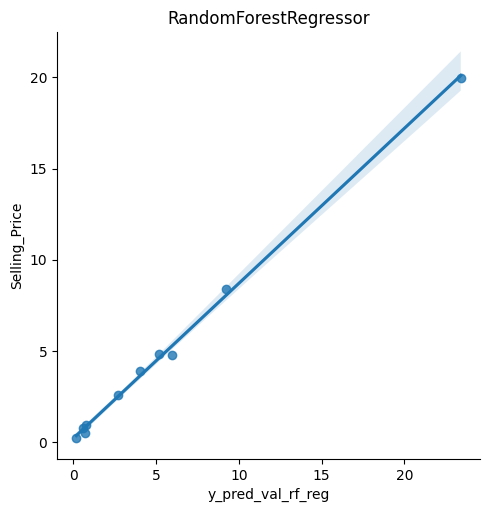

In [25]:
sns.lmplot(data=df3, x='y_pred_val_rf_reg', y='Selling_Price', height=5)
plt.title('RandomForestRegressor')
plt.show()

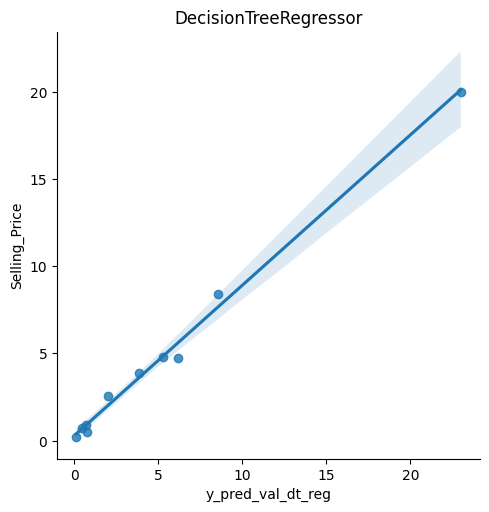

In [26]:
sns.lmplot(data=df3, x='y_pred_val_dt_reg', y='Selling_Price', height=5)
plt.title('DecisionTreeRegressor')
plt.show()

### The RandomForestRegressor model presents the best performance with the data presented in validation as it presents the lowest mean_absolute_error.